# Pytorch simple classification

In [1]:
# import matplotlib
import matplotlib.pyplot as plt
# matplotlib.rc('xtick', labelsize=20)
# matplotlib.rc('ytick', labelsize=20)
import pandas as pd
from tools.ramanflow.read_data import ReadData as RD
from tools.ramanflow.prep_data import PrepData as PD
from scipy.signal import savgol_filter
import numpy as np
import math

In [2]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.0764, 0.8574, 0.9695],
        [0.9728, 0.2996, 0.9664],
        [0.2308, 0.6778, 0.3885],
        [0.4589, 0.5393, 0.5761],
        [0.1291, 0.8679, 0.5216]])


In [5]:
torch.version

<module 'torch.version' from '/home/anvarkunanbayev/anaconda3/envs/Raman/lib/python3.8/site-packages/torch/version.py'>

### Read the data

In [2]:
MG_dataset = np.load('MG_dataset.npy')

In [3]:
Carbendazim_dataset = np.load('Carbendazim_dataset.npy')

In [4]:
Thiacloprid_dataset = np.load('Thiacloprid_dataset.npy')

In [5]:
Acephate_dataset = np.load('Acephate_dataset.npy')

In [6]:
Acetamiprid_dataset = np.load('Acetamiprid_dataset.npy')

In [7]:
Mixes_dataset = np.load('Mixes_dataset.npy')

### Preprocess the data

#### MG

In [8]:
MG_dataset_norm = np.copy(MG_dataset) / np.max(MG_dataset, axis=-1, keepdims=True)

/tmp/ipykernel_12657/2735565163.py:1: RuntimeWarning: invalid value encountered in true_divide
  MG_dataset_norm = np.copy(MG_dataset) / np.max(MG_dataset, axis=-1, keepdims=True)


In [10]:
mask = np.all(np.isfinite(MG_dataset_norm), axis=-1)

In [11]:
MG_dataset_norm_no_nan = MG_dataset_norm[mask]

#### Acephate 

In [27]:
Acephate_dataset_norm = np.copy(Acephate_dataset) / np.max(Acephate_dataset, axis=-1, keepdims=True)

In [28]:
mask = np.all(np.isfinite(Acephate_dataset_norm), axis=-1)

In [29]:
Acephate_dataset_norm_no_nan = Acephate_dataset_norm[mask]

In [30]:
std = np.std(Acephate_dataset_norm_no_nan, axis=-1)

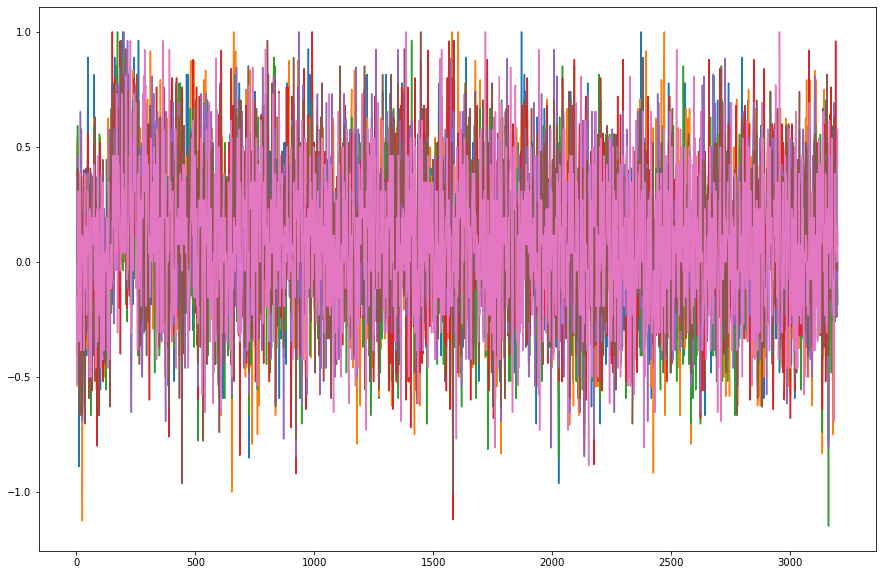

In [34]:
check = np.where(std > 0.3)[0]
plt.figure(figsize=(15,10))
for i in range(len(check)):
    plt.plot(np.arange(1, 3200, 2), Acephate_dataset_norm_no_nan[np.random])

### Import the network